In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("D:/Titanic.csv")

In [9]:
df = df[['Survived', 'Age', 'Fare']].dropna()
X = df[['Age', 'Fare']].values
y = df['Survived'].values.reshape(-1, 1)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
np.random.seed(42)
w = np.random.randn(2, 1)
b = np.random.randn(1)

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

In [19]:
learning_rate = 0.1
loss_history = []

for i in range(100):
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y_train, y_pred)
    loss_history.append(loss)
    dz = y_pred - y_train
    dw = np.dot(X_train.T, dz) / len(X_train)
    db = np.sum(dz) / len(X_train)
    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

Iteration 0: Loss = 0.8406
Iteration 10: Loss = 0.7745
Iteration 20: Loss = 0.7315
Iteration 30: Loss = 0.7041
Iteration 40: Loss = 0.6869
Iteration 50: Loss = 0.6762
Iteration 60: Loss = 0.6695
Iteration 70: Loss = 0.6652
Iteration 80: Loss = 0.6626
Iteration 90: Loss = 0.6608


In [21]:
y_test_pred = sigmoid(np.dot(X_test, w) + b) > 0.5
accuracy = np.mean(y_test_pred == y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")


✅ Test Accuracy: 0.70


In [23]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(np.dot(grid, w) + b).reshape(xx.shape)


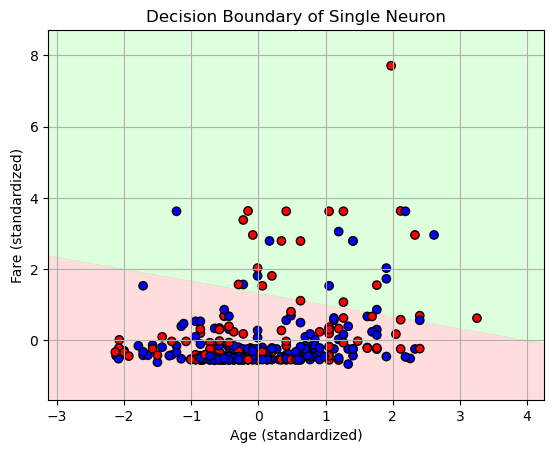

In [25]:
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.4, colors=['#FFAAAA', '#AAFFAA'])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k')
plt.title('Decision Boundary of Single Neuron')
plt.xlabel('Age (standardized)')
plt.ylabel('Fare (standardized)')
plt.grid(True)
plt.show()